# Visualization of Datasets

In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import LineString

from util.drawing import init_world_axis, plot_hexagons_on_map
from util.io import read_dataset

sns.set_theme()

In [3]:
from matplotlib.colors import ListedColormap

hexagonal_world, dataframe = read_dataset('cache/whales/dataset.pickle')
individuals = pd.unique(dataframe.index.get_level_values(0))

trajectory_color_palette = sns.color_palette(n_colors=len(individuals))
trajectory_color_palette_cmap = ListedColormap(trajectory_color_palette)

<AxesSubplot:>

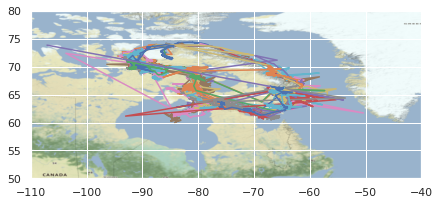

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
init_world_axis(ax, hexagonal_world, dataframe.crs)

grouped = dataframe.groupby(level=0, sort=False)['geometry'].apply(lambda subdata: LineString(subdata.tolist()))
grouped.plot(ax=ax, cmap=trajectory_color_palette_cmap)

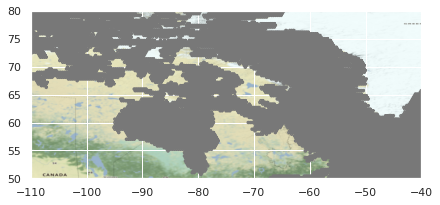

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
init_world_axis(ax, hexagonal_world, dataframe.crs)
plot_hexagons_on_map(ax, hexagonal_world)
fig.savefig('cache/whales/hexagonal-world.pdf', bbox_inches='tight')

In [7]:
def plot_individual_trajectory(index: int) -> None:
    fig, ax = plt.subplots(figsize=(12, 12))
    init_world_axis(ax, hexagonal_world, dataframe.crs)

    subset = grouped.loc[[individuals[index]]]
    subset.plot(ax=ax, cmap=ListedColormap(trajectory_color_palette_cmap(index)))

    dataframe.loc[[individuals[index]]].plot(ax=ax)

    fig.savefig(f'cache/whales/trajectory-{i}.pdf', bbox_inches='tight')
    plt.close(fig)

for i in range(len(individuals)):
    plot_individual_trajectory(i)